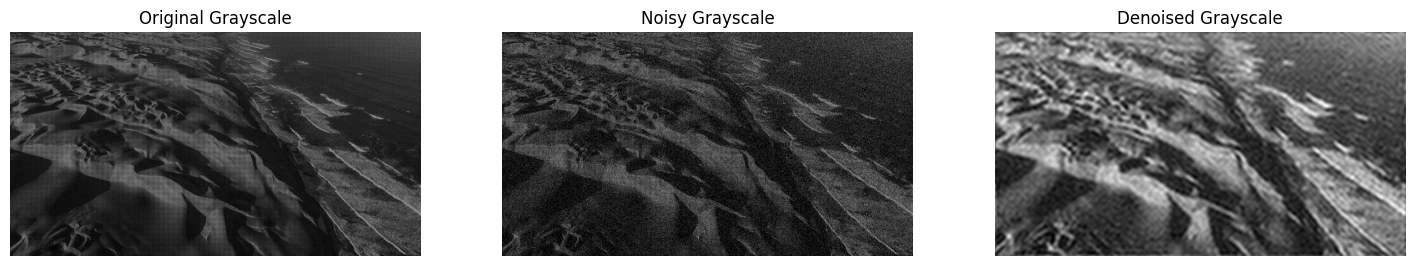

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.fftpack import fftn, ifftn, fftshift

img = Image.open('namib.jpg')
gray = img.convert('L')
arr = np.array(gray)
noise = np.random.normal(0, 15, arr.shape)
noisy = Image.fromarray(np.clip(arr + noise, 0, 255).astype('uint8'))
f = fftshift(fftn(noisy))
r, c = f.shape
cf, cr = c // 2, r // 2
kf = 0.1
mask = np.zeros((r, c), np.uint8)
mask[cr - int(r * kf):cr + int(r * kf), cf - int(c * kf):cf + int(c * kf)] = 1
f *= mask
f = ifftn(fftshift(f))
denoised = Image.fromarray(np.abs(f).astype('uint8'))

plt.figure(figsize=(18, 6))
for i, (im, title) in enumerate([(gray, 'Original Grayscale'), (noisy, 'Noisy Grayscale'), (denoised, 'Denoised Grayscale')]):
    plt.subplot(1, 3, i + 1)
    plt.imshow(im, cmap='gray')
    plt.title(title)
    plt.axis('off')
plt.show()